In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-deep')

In [2]:
log_dir = '../testcases/Log'
figures ='./figures/'

In [3]:
Normal = pd.read_csv(log_dir+'/Normal_Huffman_log.csv')
Optimized = pd.read_csv(log_dir + '/Optimized_Huffman_log.csv')

In [4]:
Normal

,Name,File_Size,Encoded_File_Size,Encoding_Time,Compression_Proportion,Diversity_of_alphabets,Decoding_Time
0,test1.txt,25292,17787,0.009065,70.326585,84,0.080753
1,test2.txt,54688,33452,0.018308,61.168812,82,0.244450
2,test3.txt,159804,92698,0.050136,58.007309,88,3.346660
3,test4.txt,627813,335088,0.181223,53.373855,84,64.310075
4,test5.txt,1247456,690260,0.374455,55.333415,91,293.079722


In [5]:
Optimized

,Name,File_Size,Optimized_Encoded_File_Size,Optimized_Encoding_Time,Optimized_Compression_Proportion,Diversity_of_alphabets,Optimized_Decoding_Time
0,test1.txt,25292,17747,0.008355,70.168433,132,0.070381
1,test2.txt,54688,32132,0.016411,58.755120,130,0.219660
2,test3.txt,159804,92874,0.047427,58.117444,283,2.152230
3,test4.txt,627813,309694,0.170669,49.329020,282,52.690708
4,test5.txt,1247456,648046,0.344223,51.949407,288,240.461849


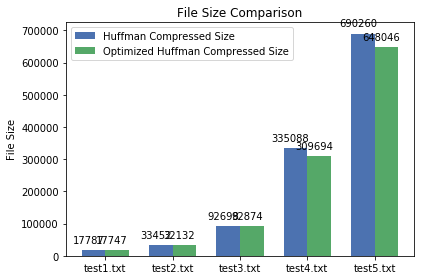

In [7]:
labels = list(Normal['Name'])
Normal_x = np.array(Normal.Encoded_File_Size)
Optimized_x = np.array(Optimized.Optimized_Encoded_File_Size)

x= np.arange(len(labels))
width =0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Normal_x, width, label='Huffman Compressed Size')
rects2 = ax.bar(x + width/2, Optimized_x, width, label='Optimized Huffman Compressed Size')

ax.set_ylabel('File Size')
ax.set_title('File Size Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(-5, 5),  # 3 points vertical offset
                    textcoords="offset pixels",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)


fig.tight_layout()

plt.show()

In [8]:
def plot(column1,column2,ylabel,title,autolabel=True):
    labels = list(Normal['Name'])
    Normal_x = np.array(Normal[column1])
    Optimized_x = np.array(Optimized[column2])

    x= np.arange(len(labels))
    width =0.35

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, Normal_x, width, label='Huffman Compressed Size')
    rects2 = ax.bar(x + width/2, Optimized_x, width, label='Optimized Huffman Compressed Size')

    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    if autolabel:
        def autolabel(rects):
            """Attach a text label above each bar in *rects*, displaying its height."""
            for rect in rects:
                height = rect.get_height()
                ax.annotate('{}'.format(height),
                            xy=(rect.get_x() + rect.get_width() / 2, height),
                            xytext=(-5, 5),  # 3 points vertical offset
                            textcoords="offset pixels",
                            ha='center', va='bottom')


        autolabel(rects1)
        autolabel(rects2)


    fig.tight_layout()
    plt.savefig(figures+'{}.png'.format(title),dpi=200)
    plt.show()
    

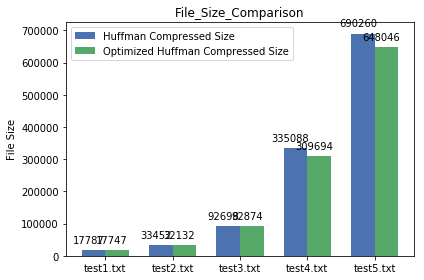

In [9]:
plot('Encoded_File_Size','Optimized_Encoded_File_Size','File Size','File_Size_Comparison')

In [10]:
Normal.columns

Index(['Name', 'File_Size', 'Encoded_File_Size', 'Encoding_Time',
       'Compression_Proportion', 'Diversity_of_alphabets', 'Decoding_Time'],
      dtype='object')

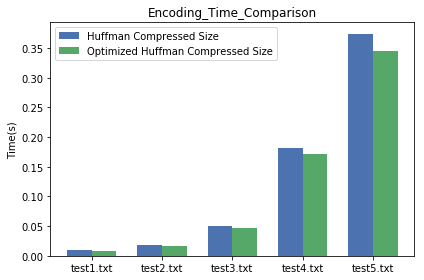

In [11]:
plot('Encoding_Time','Optimized_Encoding_Time','Time(s)','Encoding_Time_Comparison',False)

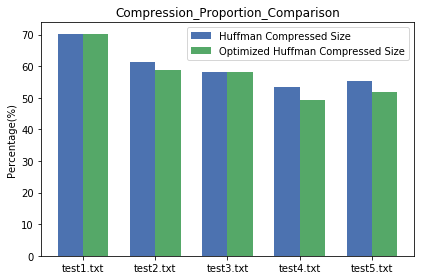

In [12]:
plot('Compression_Proportion','Optimized_Compression_Proportion','Percentage(%)','Compression_Proportion_Comparison',False)

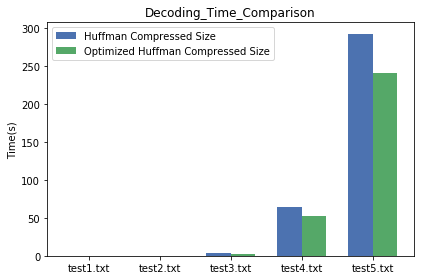

In [13]:
plot('Decoding_Time','Optimized_Decoding_Time','Time(s)','Decoding_Time_Comparison',False)

In [14]:
joined =pd.concat([Normal,Optimized],axis=1)

In [15]:
joined

,Name,File_Size,Encoded_File_Size,Encoding_Time,Compression_Proportion,Diversity_of_alphabets,Decoding_Time,Name,File_Size,Optimized_Encoded_File_Size,Optimized_Encoding_Time,Optimized_Compression_Proportion,Diversity_of_alphabets,Optimized_Decoding_Time
0,test1.txt,25292,17787,0.009065,70.326585,84,0.080753,test1.txt,25292,17747,0.008355,70.168433,132,0.070381
1,test2.txt,54688,33452,0.018308,61.168812,82,0.244450,test2.txt,54688,32132,0.016411,58.755120,130,0.219660
2,test3.txt,159804,92698,0.050136,58.007309,88,3.346660,test3.txt,159804,92874,0.047427,58.117444,283,2.152230
3,test4.txt,627813,335088,0.181223,53.373855,84,64.310075,test4.txt,627813,309694,0.170669,49.329020,282,52.690708
4,test5.txt,1247456,690260,0.374455,55.333415,91,293.079722,test5.txt,1247456,648046,0.344223,51.949407,288,240.461849


In [16]:
np.array(((joined['Optimized_Encoded_File_Size']-joined['Encoded_File_Size'])/joined['Encoded_File_Size'])*100)

array([-0.22488334, -3.94595241,  0.18986386, -7.57830779, -6.11566656])

In [17]:
def calculate_percentage(original,optimized,new_column):
    percentage= np.array(((joined[optimized]-joined[original])/joined[original])*100)
    joined[new_column]= percentage
    print(new_column)
    print("{:.2f}%".format(np.mean(percentage)))

In [18]:
calculate_percentage('Encoded_File_Size','Optimized_Encoded_File_Size',new_column='File_Size_percentage')

File_Size_percentage
-3.53%


In [19]:
joined

,Name,File_Size,Encoded_File_Size,Encoding_Time,Compression_Proportion,Diversity_of_alphabets,Decoding_Time,Name,File_Size,Optimized_Encoded_File_Size,Optimized_Encoding_Time,Optimized_Compression_Proportion,Diversity_of_alphabets,Optimized_Decoding_Time,File_Size_percentage
0,test1.txt,25292,17787,0.009065,70.326585,84,0.080753,test1.txt,25292,17747,0.008355,70.168433,132,0.070381,-0.224883
1,test2.txt,54688,33452,0.018308,61.168812,82,0.244450,test2.txt,54688,32132,0.016411,58.755120,130,0.219660,-3.945952
2,test3.txt,159804,92698,0.050136,58.007309,88,3.346660,test3.txt,159804,92874,0.047427,58.117444,283,2.152230,0.189864
3,test4.txt,627813,335088,0.181223,53.373855,84,64.310075,test4.txt,627813,309694,0.170669,49.329020,282,52.690708,-7.578308
4,test5.txt,1247456,690260,0.374455,55.333415,91,293.079722,test5.txt,1247456,648046,0.344223,51.949407,288,240.461849,-6.115667


In [20]:
calculate_percentage('Encoding_Time','Optimized_Encoding_Time',new_column='Encoding_time_percentage')

Encoding_time_percentage
-7.50%


In [21]:
joined

,Name,File_Size,Encoded_File_Size,Encoding_Time,Compression_Proportion,Diversity_of_alphabets,Decoding_Time,Name,File_Size,Optimized_Encoded_File_Size,Optimized_Encoding_Time,Optimized_Compression_Proportion,Diversity_of_alphabets,Optimized_Decoding_Time,File_Size_percentage,Encoding_time_percentage
0,test1.txt,25292,17787,0.009065,70.326585,84,0.080753,test1.txt,25292,17747,0.008355,70.168433,132,0.070381,-0.224883,-7.830089
1,test2.txt,54688,33452,0.018308,61.168812,82,0.244450,test2.txt,54688,32132,0.016411,58.755120,130,0.219660,-3.945952,-10.365798
2,test3.txt,159804,92698,0.050136,58.007309,88,3.346660,test3.txt,159804,92874,0.047427,58.117444,283,2.152230,0.189864,-5.403118
3,test4.txt,627813,335088,0.181223,53.373855,84,64.310075,test4.txt,627813,309694,0.170669,49.329020,282,52.690708,-7.578308,-5.823421
4,test5.txt,1247456,690260,0.374455,55.333415,91,293.079722,test5.txt,1247456,648046,0.344223,51.949407,288,240.461849,-6.115667,-8.073588


In [22]:
calculate_percentage('Compression_Proportion','Optimized_Compression_Proportion',new_column='Compression_Proportion_percentage')

Compression_Proportion_percentage
-3.53%


In [23]:
calculate_percentage('Decoding_Time','Optimized_Decoding_Time',new_column='Decoding_Time_percentage')

Decoding_Time_percentage
-18.94%
